In [81]:
import re
import string
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import nltk
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [82]:
df = pd.read_csv("flipkart_reviews.csv")

In [83]:
df.head()

,Product_name,Review,Rating
0,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Best under 60k Great performanceI got it for a...,5
1,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Good perfomence...,5
2,Lenovo Ideapad Gaming 3 Ryzen 5 Hexa Core 5600...,Great performance but usually it has also that...,5
3,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,My wife is so happy and best product 👌🏻😘,5
4,DELL Inspiron Athlon Dual Core 3050U - (4 GB/2...,"Light weight laptop with new amazing features,...",5


In [84]:
print(data.isnull().sum())

Review      0
Positive    0
Negative    0
Neutral     0
dtype: int64


In [85]:
stemmer = nltk.SnowballStemmer("english")
stopword = set(stopwords.words("english"))

In [86]:
def clean(text):
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = [word for word in text.split(' ') if word not in stopword]
    text=" ".join(text)
    text = [stemmer.stem(word) for word in text.split(' ')]
    text=" ".join(text)
    return text

In [87]:
df["Review"] = df["Review"].apply(clean)

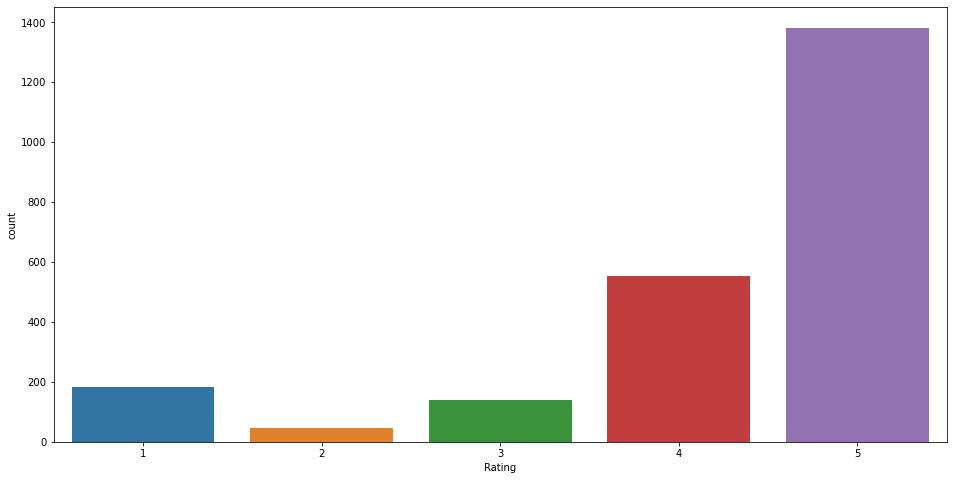

In [88]:
plt.figure(figsize=(16,8))
sns.countplot(data = df, x = "Rating")
plt.show()

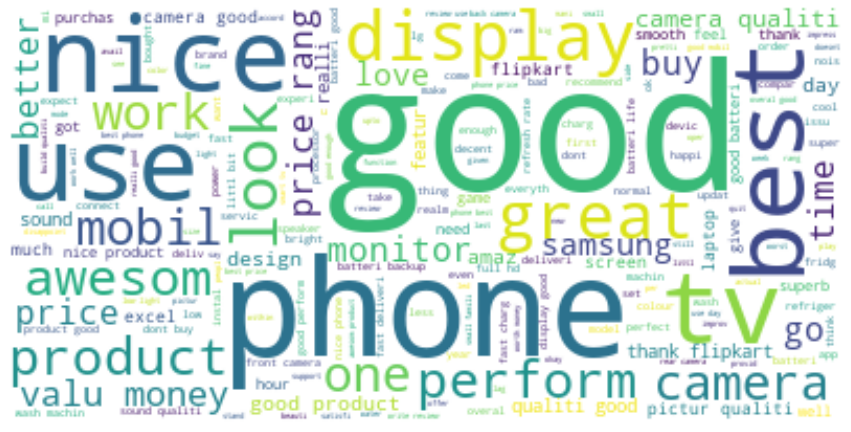

In [89]:
text = " ".join(i for i in df['Review'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, 
                      background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [90]:
nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()
df["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in df["Review"]]
df["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in df["Review"]]
df["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in df["Review"]]
df = df[["Review", "Positive", "Negative", "Neutral"]]

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\PC\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [91]:
df.head()

,Review,Positive,Negative,Neutral
0,best great performancei got around backup bi...,0.395,0.101,0.504
1,good perfom,0.744,0.000,0.256
2,great perform usual also game laptop issu batt...,0.277,0.000,0.723
3,wife happi best product 👌🏻😘,0.512,0.000,0.488
4,light weight laptop new amaz featur batteri li...,0.000,0.000,1.000


In [92]:
x = sum(df["Positive"])
y = sum(df["Negative"])
z = sum(df["Neutral"])

def sentiment_score(a, b, c):
    if (a>b) and (a>c):
        print("Positive 😊 ")
    elif (b>a) and (b>c):
        print("Negative 😠 ")
    else:
        print("Neutral 🙂 ")
        
sentiment_score(x, y, z)

Neutral 🙂 


In [93]:
print("Positive: ", x)
print("Negative: ", y)
print("Neutral: ", z)

Positive:  923.5529999999985
Negative:  96.77500000000013
Neutral:  1283.6880000000006


In [94]:
classes = ['Positive','Negative','Neutral']
def predict(text):
    text = clean(text)
    pos = sentiments.polarity_scores(text)["pos"]
    neg = sentiments.polarity_scores(text)["neg"]
    neu = sentiments.polarity_scores(text)["neu"] 
    return pos, neg, neu

In [95]:
text = 'great devic let tell  superb build qualiti  great display  camera great good light condit  process great  sound superb  call qualiti great  red colour look  portrait mode photographi superb'

In [96]:
print(f"Sentiment Analysis Class '{classes[np.argmax(predict(text))]}' and Score {predict(text)[np.argmax(predict(text))]}")

Sentiment Analysis Class 'Positive' and Score 0.653
